In [3]:
import dill
import struct
import pickle
import numpy as np
import matplotlib.pyplot as plt

from my.net import *

In [33]:
# 用于适配interview接口
class CIFAR_Net(Net):
    @staticmethod
    def unpickle(file):
        with open(file, 'rb') as f:
            dict = pickle.load(f, encoding='bytes')
        return dict

    @staticmethod
    def one_hot(labels, num_classes):
        one_hot_labels = np.zeros((len(labels), num_classes))
        for i in range(len(labels)):
            one_hot_labels[i, labels[i]] = 1
        return one_hot_labels

    def interview(self, eval_datafile_path):
        pass

In [39]:
meta = CIFAR_Net.unpickle("cifar10_testdata/batches.meta")
for key in meta.keys():
    print(f"{key}: {meta[key]}")

label_idx2name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print()
print("每批次样本数: 10000")
print("图片维度: 3 * 32 * 32")
print("标签种类: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck")

b'num_cases_per_batch': 10000
b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
b'num_vis': 3072

每批次样本数: 10000
图片维度: 3 * 32 * 32
标签种类: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck


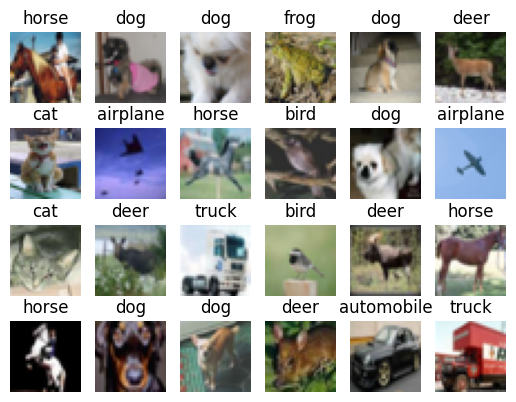

(50000, 3, 32, 32) (50000, 10)


In [42]:
images = []
labels = []

# 读取文件数据
for i in range(1, 6):
    data_batch = CIFAR_Net.unpickle(f"cifar10_testdata/data_batch_{i}")
    images.append(data_batch[b"data"])
    labels.append(data_batch[b"labels"])
images, labels = np.concatenate(images), np.concatenate(labels)



# 随机打乱数据
np.random.seed(0)
indices = np.random.permutation(len(images))
images = images[indices]
labels = labels[indices]

# 添加图片宽高与通道
images = images.reshape(-1, 3, 32, 32)
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(images[i].transpose(1, 2, 0))
    plt.title(label_idx2name[labels[i]])
    plt.axis("off")
plt.show()

# 独热编码标签
labels = CIFAR_Net.one_hot(labels, 10)
print(images.shape, labels.shape)

In [41]:
# 分割训练集与验证集 (4:1)
split = int(len(images) * 0.8)
train_images, valid_images = images[:split], images[split:]
train_labels, valid_labels = labels[:split], labels[split:]